#  实验５.1: 常微分方程性态和R-K法稳定性试验

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (9.0, 6.0) 

**本代码依赖于python3以及其下的matplotlib,numpy和pandas**

In [29]:
class RK4(object):
    """
    the Runge-Kutta object is the main functional component,
    """
    
    def __init__(self, function):
        """
        initialize the object
        function is y^\prime w.r.t. (x,y)
        x and y are the lists to store the discrete variables
        """
        
        self.f = function
        self.y = []
        self.x = []

        
    def solve(self, x_0, y_0, h, end):
        """
        the public func to solve ode,
        end is the maximum x
        h is the step size
        y_0 is the initial y value
        """

        x_i = x_0
        y_i = y_0
        
        if h==0:
            raise(ValueError("Step Size can't be zero!"))
        else:
            while x_i + h <= end:
                self.x.append(x_i)
                self.y.append(y_i)
                y_i = self._iterate(y_i, x_i, h)
                x_i += h


    def _iterate(self, y_i, x_i, h):
        """
        this function is a private iterator
        produce y_{i+1} from (x_i,y_i)
        """
        
        k1 = self.f(x_i, y_i)

        k2 = self.f(x_i + 0.5*h, y_i + 0.5*h*k1)

        k3 = self.f(x_i + 0.5*h, y_i + 0.5*h*k2)

        k4 = self.f(x_i + h, y_i + h*k3)

        return y_i + h*(k1 + 2*k2 + 2*k3 + k4) / 6.0
    
    
    def plot(self,lab,lt):
        """
        public func used to plot the solution 
        'import matplotlib.pyplot as plt' is needed
        """
        plt.plot(self.x, self.y, lt, label=lab)
        plt.xlabel("x")
        plt.ylabel("y")

## (1)

<IPython.core.display.Javascript object>


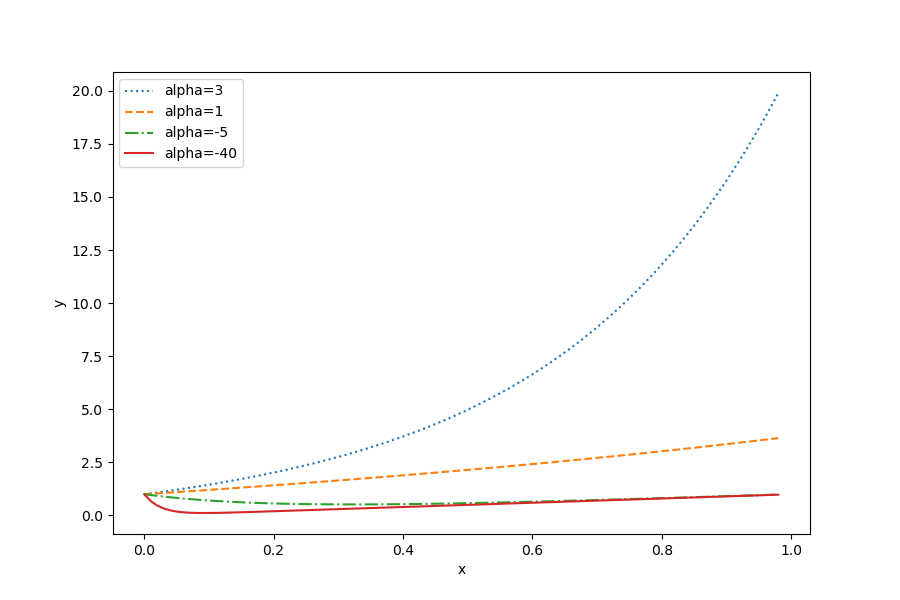

In [40]:
if __name__ == "__main__":
    
    line_type = {0:':', 1:'--', 2:'-.', 3:'-'}
    i = 0
    
    for alpha in [3, 1, -5, -40]:
        dydx = RK4(lambda x,y : alpha*y - alpha*x + 1)
        dydx.solve(0, 1, 0.01, 1)
        dydx.plot("alpha=" + str(alpha), line_type[i])
        i += 1
    
    plt.legend()

<font size=4>通过上图中 $\alpha=[-40,-5,1,3]$ 的解的画图比较可以发现，当$\alpha$的取值为正值时，得到的数值结果迅速增大(因此该处正数$\alpha$只取到$3$,当进一步增大，会导致其他曲线无法在图中区分)．  
    说明当$\alpha$为大的正值时，该初值问题是坏条件的，其他情况下该初值问题是好条件的．</font>

<font size=4>当大的正值$\alpha$进一步增大为$alpha=[-40,-5,5,40]$，图线变为下图：</font>

<IPython.core.display.Javascript object>


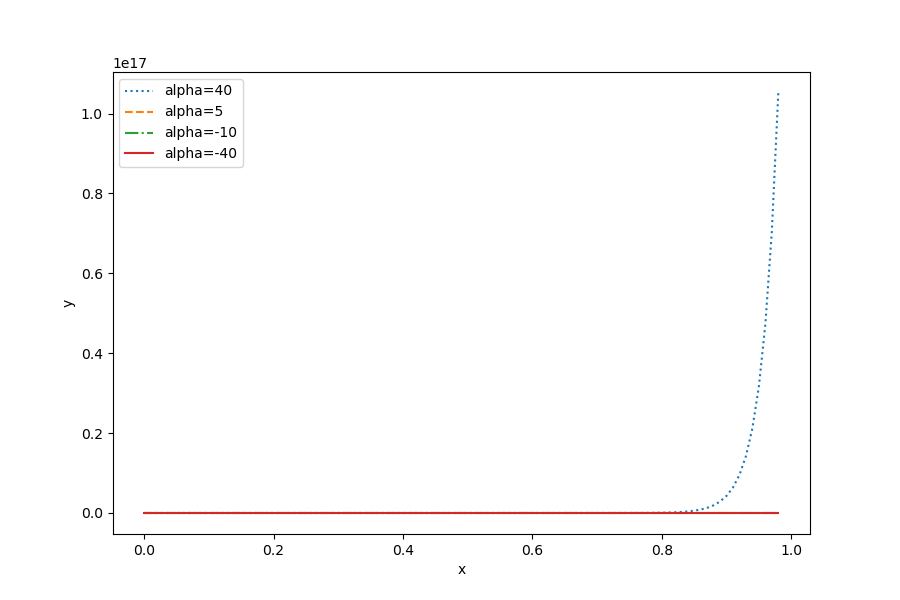

In [39]:
if __name__ == "__main__":
    
    line_type = {0:':', 1:'--', 2:'-.', 3:'-'}
    i = 0
    
    for alpha in [40, 5, -10, -40]:
        dydx = RK4(lambda x,y : alpha*y - alpha*x + 1)
        dydx.solve(0, 1, 0.01, 1)
        dydx.plot("alpha=" + str(alpha), line_type[i])
        i += 1
    
    plt.legend()

## (2)

<font size=4>$\lambda=\frac{\partial f}{\partial y}=\alpha$  
             由$-2.785\le \lambda h \le 0$以及令$\alpha=-30$(保证稳定域足够小使得非稳定条件下可取十个点)  
             可以得到: $0\le h\le 0.0928$  
             下面分别取h=0.01和0.1</font>

<IPython.core.display.Javascript object>


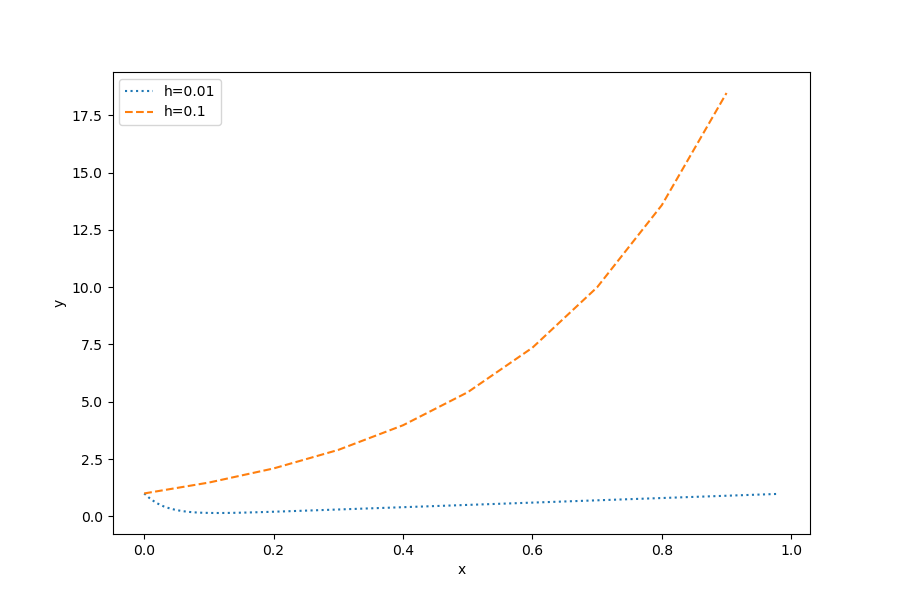

In [45]:
if __name__ == "__main__":
    
    linetype = {0:':', 1:'--'}
    i = 0
    alpha = -30
    
    for h in [0.01,0.1]:
        dydx = RK4(lambda x,y : alpha*y - alpha*x + 1)
        dydx.solve(0, 1, h, 1)
        dydx.plot("h=" + str(h), linetype[i])
        i += 1
    
    plt.legend()

<font size=4>可见当步长超出稳定域时，计算值会显著错误．列表对比如下</font>

In [121]:
if __name__ == "__main__":
    alpha = -30
    dydx_in = RK4(lambda x,y : alpha*y - alpha*x + 1)
    dydx_in.solve(0, 1, 0.01, 1)
    
    dydx_out = RK4(lambda x,y : alpha*y - alpha*x + 1)
    dydx_out.solve(0, 1, 0.1, 1)
    
    in_xy = pd.DataFrame({"x":dydx_in.x, "y":dydx_in.y})
    in_xy = in_xy[in_xy["x"]*100%10 < 0.001]
    in_xy["x"] = np.arange(0, 1, 0.1)

    out_xy = pd.DataFrame({"x":dydx_out.x, "y":dydx_out.y})
    out_xy["x"] = np.arange(0, 1, 0.1)

    compare = pd.merge(in_xy,out_xy,on="x")
    print(compare.rename(columns = {"y_x":"y_in", "y_y":"y_out"}))

     x      y_in      y_out
0  0.0  1.000000   1.000000
1  0.1  0.149800   1.475000
2  0.2  0.202480   2.090625
3  0.3  0.300124   2.899609
4  0.4  0.400006   3.974463
5  0.5  0.500000   5.414886
6  0.6  0.600000   7.357969
7  0.7  0.700000   9.992207
8  0.8  0.800000  13.576785
9  0.9  0.900000  18.468079


<font size=4>上表中"in"表示步长在稳定域内的对应结果，"out"则反之．</font>